In [2]:
!pip install tweepy
!pip install textblob
!pip install wordcloud
!pip install nltk

You should consider upgrading via the 'C:\Users\saida\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\saida\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\saida\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\saida\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:

! python -m pip install scikit-learn-intelex
from sklearnex import patch_sklearn
patch_sklearn()



import tweepy
import numpy as np
import pandas as pd
import os
import re
import time
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.svm import SVC
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('fivethirtyeight')

You should consider upgrading via the 'C:\Users\saida\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saida\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saida\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\saida\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:

file = '/content/drive/MyDrive/tweet_data.csv'

In [6]:
colnames = ['target', 'id', 'date','flag','user','text']

In [7]:
# originalDataDF = pd.read_csv(file,names=colnames,delimiter=',',engine='python',nrows=None,encoding='latin-1',header=None)

originalDataDF = pd.read_csv('tweet_data.csv', names=colnames, delimiter=',' ,engine='python', nrows=None, encoding='latin-1', header=None)

In [8]:
originalDataDF.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
# def datasplitfortraining(l1=[],l2=[],m=0):
#     k = 0
#     for i in range(len(requiredTweetData)):
#         if(k==5000):
#             break
#         if requiredTweetData['target'][i] == m:
#             l1.append(requiredTweetData['target'][i])
#             l2.append(requiredTweetData['text'][i])
#             k+=1
#     newmodifieddf = pd.DataFrame({'target':l1,'text':l2})
#     return newmodifieddf



# d1 = datasplitfortraining(m=4)
# d2 = datasplitfortraining(m=2)
# d3 = datasplitfortraining(m=0)

In [10]:
def handling_emojis(text):
    # Smile -- :), : ), :-), (:, ( :, (-:, :')
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' EMO_POS ', text)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' EMO_POS ', text)
    # Love -- <3, :*
    text = re.sub(r'(<3|:\*)', ' EMO_POS ', text)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-;
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' EMO_POS ', text)
    # Sad -- :-(, : (, :(, ):, )-:
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' EMO_NEG ', text)
    # Cry -- :,(, :'(, :"(
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' EMO_NEG ', text)
    
    return text

In [11]:
# cleaning the text

# removing tagged username '@'
def cleaningText(text):
    text = text.strip('\'"?!,.():;') # removing punctuation
    text = re.sub(r'(.)\1+', r'\1\1', text) # convert more than 2 letter repetitions to 2 letter #fooood -> food
    text = re.sub(r'(-|\')','',text) # removing additional -& '
    text = re.sub(r'@[A-Za-z0-9]+','',text) #removing @usernames
    text = re.sub(r'#','',text) #removing '#' symbols
    text = re.sub(r'RT[\s]+','',text) #removes RT(Re-Tweet) string 
    text = re.sub(r'https?:\/\/\S+','',text) #removing the hyperlink
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', text) #removing urls
    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)
    # Strip space, " and ' from tweet
    text = text.strip(' "\'')
    # Replace emojis with either EMO_POS or EMO_NEG
    text = handling_emojis(text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    text = text.lower() #make the text to lowercase
    return text


In [12]:
originalDataDF['text'] = originalDataDF['text'].apply(cleaningText)
originalDataDF['text'][0]

'aww, thats a bummer. you shoulda got david carr of third day to do it. emo_pos '

In [13]:
contractionWords = {
"aren’t":"are not","can’t":"can not","couldn’t":"could not ","didn’t":"did not","doesn’t":"does not","don’t":"do not","hadn’t":"had not","hasn’t":"has not ","haven’t":"have not",
"I’m":"I am","I’ve":"I have","isn’t":"is not","let’s":"let us","mightn’t":"might not","mustn’t":"must not","shan’t":"shall not","shouldn’t":"should not","that’s":" that is","he’ll":" he will",
"I’ll":"I will","she’ll":"she will","she’s":"she is","there’s":"there is","they’ll":" they will","they’re":"they are","they’ve":"they have","we’re":"we are","we’ve":"we have","weren’t":"were not",
"what’ll":"what will","what’re":"what are","what’ve":"what have","where’s":"where is","who’d":"who would","who’ll":"who will","who’re":"who are","who’s":"who is","who’ve":"who have","won’t":"will not",
"wouldn’t":"would not","you’d":"you would","you’re":"you are","you’ve":"you have","it’s":"it is","wasn't":"was not"
}

In [14]:
# negation handling
def negationHandling(text):
    words = text.split()
    temp = [contractionWords[word] if word in contractionWords else word for word in words]
    temp = " ".join(temp)
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(negationHandling)

In [15]:
word_set = []
def wordTokenize(text):
    tokens = word_tokenize(text)
    return tokens
originalDataDF['text'] = originalDataDF['text'].apply(wordTokenize)
originalDataDF['text'][0]

['aww',
 ',',
 'thats',
 'a',
 'bummer',
 '.',
 'you',
 'shoulda',
 'got',
 'david',
 'carr',
 'of',
 'third',
 'day',
 'to',
 'do',
 'it',
 '.',
 'emo_pos']

In [16]:
stop_words = stopwords.words('english')
def removeStopWords(tokens):
    temp = [word for word in tokens if word not in stop_words]
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(removeStopWords)
originalDataDF['text'][0]

['aww',
 ',',
 'thats',
 'bummer',
 '.',
 'shoulda',
 'got',
 'david',
 'carr',
 'third',
 'day',
 '.',
 'emo_pos']

In [17]:
def removeUnnecessaryChars(tokens):
    temp = [word for word in tokens if word.isalpha()]
    return temp
originalDataDF['text'] = originalDataDF['text'].apply(removeUnnecessaryChars)
originalDataDF['text'][0]

['aww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

In [18]:
lemma = WordNetLemmatizer()
def lemmatizeTweets(wordList):
    temp = []
    for word in wordList:
        _word = lemma.lemmatize(word)
        temp.append(_word)
    return ' '.join(temp)
originalDataDF['text'] = originalDataDF['text'].apply(lemmatizeTweets)


In [19]:
originalDataDF['text'][0]

'aww thats bummer shoulda got david carr third day'

In [20]:
def datasplitfortraining(l1=[],l2=[],m=0):
    k = 0
    for i in range(len(originalDataDF)):
        if(k==50000):
            break
        if originalDataDF['target'][i] == m:
            l1.append(originalDataDF['target'][i])
            l2.append(originalDataDF['text'][i])
            k+=1
    newmodifieddf = pd.DataFrame({'target':l1,'text':l2})
    return newmodifieddf



d1 = datasplitfortraining(m=4)
d2 = datasplitfortraining(m=2)
d3 = datasplitfortraining(m=0)

In [21]:
# temp_pos = d3.loc[d3['target'] == 0]
# temp_neg = d3.loc[d3['target'] == 4]
d3

,target,text
0,4,love u guy r best
1,4,im meeting one besties tonight cant wait girl ...
2,4,thanks twitter add sunisa got meet hin show dc...
3,4,sick really cheap hurt much eat real food plus...
4,4,effect everyone
...,...,...
99995,0,insomnia prob slept hr woke nd couldnt go back...
99996,0,mintues late meeting starting howd know going ...
99997,0,super excited tweeting event happening way fol...
99998,0,want another day much sht today got quot quot ...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer = TfidfVectorizer(min_df = 5,max_df=0.8,sublinear_tf = True,use_idf = True)

In [24]:
train_vectors = vectorizer.fit_transform(d3['text'])

In [25]:
print(train_vectors.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
X = train_vectors.toarray()
y = np.where(d3['target'] == 0 , -1 , 1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [28]:
X_train.shape

(80000, 9094)

In [29]:
y_train.shape

(80000,)

In [30]:
import math
from math import sqrt
from math import exp
from math import pi
import numpy as np

In [56]:
class Navie_Bayes:
    
      def __init__(self):
          ## instantiating the class here
          seperated_classes_training_data = dict()
          pass
    
      def getInfo(self, seperated_classes_training_data):
          ## this function gets information from the seperated dataset.
          self.Classes = len(seperated_classes_training_data.keys()) 
          # Get the number of Class.
          for i in range(self.Classes):
            if len(seperated_classes_training_data[i]) != 0:
                self.Features = len(seperated_classes_training_data[i][0])
                break
            self.eachClass = np.zero(self.Classes)
            for i in range(self.Classes):
                DataOfClass = len(seperated_classes_training_data[i])
                self.eachClass[i] = DataOfClass
                self.trainingData += DataOfClass
    
      def classes_seperate_subset(self, X, y):
        ## we need to find the probability of the data by the class with which they belong to, so we need to seperate our training data by class.
        ## so this function splits the dataset by class values, return dictonary
        seperated_classes_training_data = {}
        for i in range(len(X)):
            class_value = y[i]
            vector_values = X[i]
            if class_value not in seperated_classes_training_data:
                seperated_classes_training_data[class_value] = []
                seperated_classes_training_data[class_value].append(vector_values)
        return seperated_classes_training_data
    
      def info_statistics(self, X):
        ## standard deviation and mean of features are calculated here.
        for features in zip(*X):
                  yield {
                  'std' : np.std(feature),
                  'mean' : np.mean(feature)
              }
    
      def mean(numbers):
          #calculates the mean where we later input the features vector
          return sum(numbers) / float(len(numbers))
    
      def std(numbers):
          #calculates the standard deviation where we later input the features vector
          variance = sum([(x - mean(numbers) **2 for x in numbers]) / float(len(numbers) - 1)
          return sqrt(variance)
    
      def fit(self, X, y):
        ## trains the model which means we are telling to learn from the dataset. fits the model with training data and labels the data as input.
        ## create a dictionary containing input data seperated by class label.
          self.feature_summary = {}
          for i in range(len(seperated_classes_training_data)):
              features = X[i]
              label = y[i]
              if label not in self.feature_summary:
                  self.feature_summary[label] = []
              self.feature_summary[label].append(features)
          seperated_classes = self.classes_seperate_subset(X, y)
          self.class_summary = {}
          for class_value, vector_values in seperated_classes.items():
              self.class_summary[class_value] = {
                 'prior_proba': len(vector_values)/len(X),
                  'summary': [i for i in self.info_statistics(vector_values)],
              }
          return self.class_summary
    
      def calculate_probability(self, x, mean, std):
          ## calculate conditional probability of a gaussian distribution
          exponent_value = np.exp(-((x-mean)**2 / (2*std**2)))
          return (exponent_value/(match.sqrt(2*math.pi)*std))
    
      def predict(self, X):
          ## returns the class predictions for each row in X.
          predictions = []
          for x in X:
              probabilities = {}
              for class_name, target in self.class_summary.items():
                  t1 = target['summary']
                  val = 1
                  for i in range(len(t1)):
                      feature = x[i]
                      mean = t1[i]['mean']
                      std = t1[i]['std']
                      val = val * self.calculate_probability(feature, mean, std)
                  probabilities[class_name] = target['prior_proba'] * val

              predictions.append(max(probabilities, key=probabilities.get)
          return predictions



In [57]:
def accuracy(y_test, y_pred):
        """
        Calculates model's accuracy.
        """

        correct_values = 0

        for i in range(len(y_pred)):
            if y_test[i] == y_pred[i]:
                correct_values += 1 
        return (correct_values/len(y_test))

In [59]:
nb = Navie_Bayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print('Naive Bayes Accuracy: ', accuracy(y_test, y_pred))

C:\Users\saida\AppData\Local\Temp\ipykernel_3800\1277149293.py:114: RuntimeWarning: invalid value encountered in double_scalars
  exponent_value =   np.exp(-((x-mean)**2 / (2*std**2)))
C:\Users\saida\AppData\Local\Temp\ipykernel_3800\1277149293.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  exponent_value =   np.exp(-((x-mean)**2 / (2*std**2)))
C:\Users\saida\AppData\Local\Temp\ipykernel_3800\1277149293.py:115: RuntimeWarning: invalid value encountered in double_scalars
  return (exponent_value / (math.sqrt(2 * math.pi) * std))


Naive Bayes Accuracy:  0.5


In [66]:
# Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
# Naive Bayes Classifier


model_naive = nb.fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)

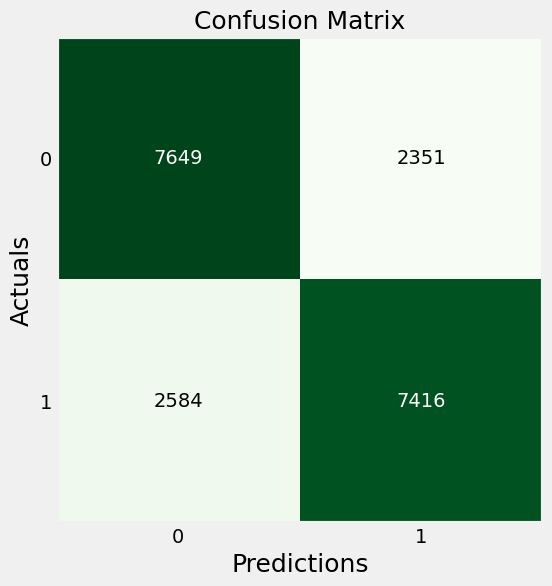

In [67]:
from sklearn.metrics import confusion_matrix
#import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix
 
mat = confusion_matrix(y_test, predicted_naive)

fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [68]:
FalsePositive = mat.sum(axis=0) - np.diag(mat)  
FalseNegative = mat.sum(axis=1) - np.diag(mat)
TruePositive = np.diag(mat)
TrueNegative = mat.sum() - (FalsePositive + FalseNegative + TruePositive)

FalsePositive = FalsePositive.astype(float)
FalseNegative = FalseNegative.astype(float)
TruePositive = TruePositive.astype(float)
TrueNegative = TrueNegative.astype(float)


In [69]:
#  Recall, or True positive rate
TPR = TruePositive/(TruePositive+FalseNegative)
print('Recall :',TPR)
# Specificity or True negative rate
TNR = TrueNegative/(TrueNegative+FalsePositive) 
print('Specificity :',TNR)
# Precision or Positive predictive value
PPV = TruePositive/(TruePositive+FalsePositive)
print('Precision :',PPV)
# Negative Predictive value
NPV = TrueNegative/(TrueNegative+FalseNegative)
# Fall out or false positive rate
FPR = FalsePositive/(FalsePositive+TrueNegative)
# False negative rate
FNR = FalseNegative/(TruePositive+FalseNegative)
# False discovery rate
FDR = FalsePositive/(TruePositive+FalsePositive)

Recall : [0.7649 0.7416]
Specificity : [0.7416 0.7649]
Precision : [0.74748363 0.75929149]


In [71]:
recall_score(y_test,y_pred)

0.484


In [74]:
f1_score(y_test,y_pred)

0.531


In [77]:
import nltk # needed for Naive-Bayes
import numpy as np
from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

In [101]:
strtfdKFold = StratifiedKFold(n_splits=3)
#splitting train 80 data into k folds
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#performing kfold cross validation
for k, (train, test) in enumerate(kfold):
    model_naive.fit(X_train[train, :], y_train[train])
    preds = model_naive.predict(X_train[test, :])
    score = accuracy_score(y_train[test],preds)
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))



Fold:  1, Accuracy: 0.487


Cross-Validation accuracy: 0.487 +/- 0.000
Fold:  2, Accuracy: 0.489


Cross-Validation accuracy: 0.487 +/- 0.002
Fold:  3, Accuracy: 0.484


Cross-Validation accuracy: 0.487 +/- 0.002
